Matias Medrano Ascencio

Jueves 19 de octubre del 2023

# Repaso - Módulo 2
---

## Cifrado

Se recibió un mensaje cifrado con un método congruencial simple: $ x_n = (ax_{n-1}+b)\mod m $.

El cifrado que se usó es el siguiente:
- 0 corresponde a 'A'
- 1 corresponde a 'B'
- 2 corresponde a 'C'
- ...
- 25 corresponde a 'Z' (no hay 'Ñ')
- Se toma la letra y se le suma un número aleatorio desconocido.
- Se generan 3 números antes de empezar el cifrado; esto quiere decir que la primera letra es "Letra + $x_4$"
- El mensaje que llegó fue: "12, 18, 9, 25"

Sabiendo de antemano que los parámetros de este generador son $m=16$, $a=5$, $b=3$ y que la semilla fue $7$; ¿cuál es el mensaje decodificado?

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [53]:
m = 16
a = 5
b = 3
x0 = 7


x1 = (a*x0 + b)% m
x2 = (a*x1 + b)% m
x3 = (a*x2 + b)% m
x4 = (a*x3 + b)% m
x5 = (a*x4 + b)% m
x6 = (a*x5 + b)% m
x7 = (a*x6 + b)% m
x8 = (a*x7 + b)% m
x9 = (a*x8+ b)% m
x10 = (a*x9 + b)% m

x4, x5, x6, x7

(11, 10, 5, 12)

In [54]:
12-11

1

In [55]:
18-10

8

In [56]:
9-5

4

In [57]:
25-12

13

El mensaje es BIEN.


## Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [2]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b - a)

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [3]:
def f1(x):
    return (1 + x**4)**(1/2)

def f2(x):
    return np.log(np.log(x))

def f3(x):
    return 1/np.log(x)

def f4(x):
    return np.exp(-x**2/2)

In [4]:
N = np.logspace(1, 5, 5)

table = pd.DataFrame(columns=["Aproximación 1", "Aproximación 2", "Aproximación 3", "Aproximación 4"], index = N)

In [5]:
for i in N:
    aproximacion1 = montecarlo(f1, int(i), 4, 5)
    table.loc[i, "Aproximación 1"] = aproximacion1
    aproximacion2 = montecarlo(f2, int(i), 4, 5)
    table.loc[i, "Aproximación 2"] = aproximacion2
    aproximacion3 = montecarlo(f3, int(i), 4, 5)
    table.loc[i, "Aproximación 3"] = aproximacion3
    aproximacion4 = montecarlo(f4, int(i), 4, 5)
    table.loc[i, "Aproximación 4"] = aproximacion4

In [6]:
table

,Aproximación 1,Aproximación 2,Aproximación 3,Aproximación 4
10.0,20.282731,0.413752,0.669954,0.000149
100.0,19.905046,0.41088,0.664813,0.000073
1000.0,20.20204,0.406058,0.668364,0.00008
10000.0,20.323814,0.405995,0.667418,0.000078
100000.0,20.360904,0.405907,0.667095,0.000079


## Montecarlo Tipo 2
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

In [7]:
def g(x,y):
    return (x**2 + 2*y**2) <= (-2*x + 8*y - 7)

def montecarlo2(region, xA, xB, yA, yB, N):
    x = np.random.uniform(xA, xB, N)
    y = np.random.uniform(yA, yB, N)
    B = region(x, y)
    AR = (xB - xA)*(yB - yA)
    return np.mean(B)*AR

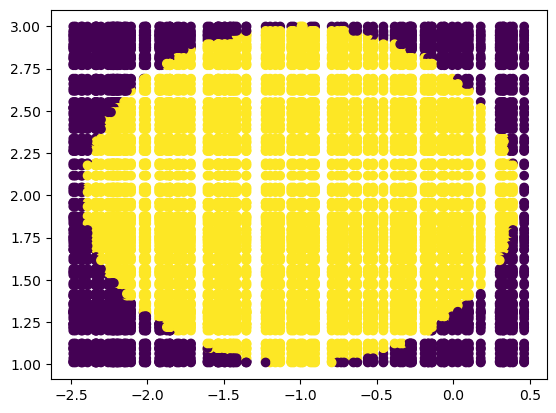

In [13]:
x = np.random.uniform(-2.5, 0.5, 100)
y = np.random.uniform(1, 3, 100)

X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=g(X, Y))

In [14]:
Num = np.logspace(1, 5, 5)
table = pd.DataFrame(columns=["Área aproximada"], index = Num)

In [16]:
for i in Num:
    area_aprox = montecarlo2(g, -2.5, 0.5, 1, 3, int(i))
    table.loc[i, "Área aproximada"] = area_aprox
table

,Área aproximada
10.0,3.6
100.0,4.26
1000.0,4.41
10000.0,4.4292
100000.0,4.45206


---
## Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [17]:
import pandas as pd
import numpy as np

In [18]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

df.round(2)

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


In [23]:
import random

T0 = np.array([
    [0.5, 0],
    [0, 0.5]
])

D0 = np.array([1, 1])

T1 = np.array([
    [0.5, 0],
    [0, 0.5]
])

D1 = np.array([50, 1])

T2 = np.array([
    [0.5, 0],
    [0, 0.5]
])

D2 = np.array([1, 50])

T3 = np.array([
   [0.5, 0],
    [0, 0.5]
])

D3 = np.array([50, 50])

x = [np.array([0, 0])]

T = [T0, T1, T2, T3]
D = [D0, D1, D2, D3]

for k in range(1000000):
    i = random.choices([0, 1, 2, 3], weights=df['$p_i$'])[0]
    xkm1 = T[i] @ x[-1] + D[i]
    x.append(xkm1)

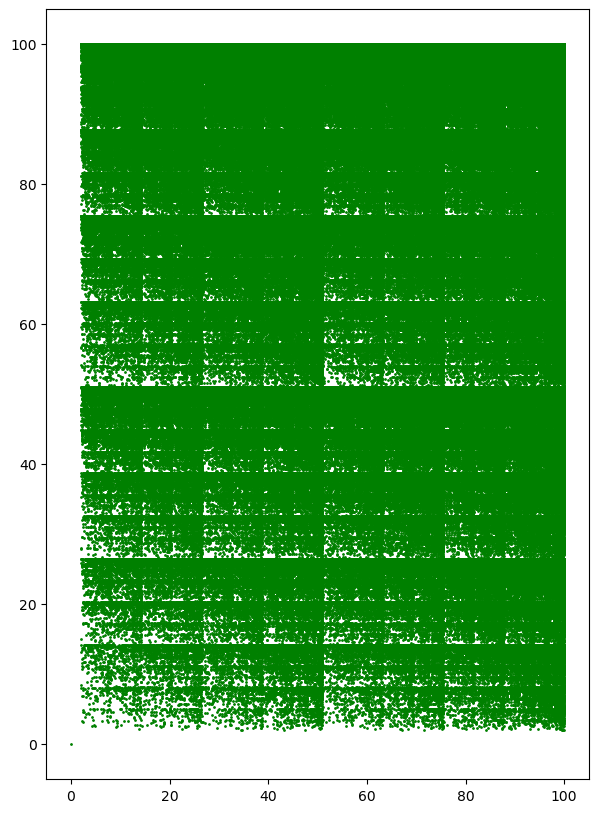

In [24]:
resultado = np.array(x)
plt.figure(figsize=(7,10))
plt.scatter(resultado[:, 0], resultado[:, 1], s=1, c="g")

---
## Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

In [25]:
import yfinance as yf

def getClose(name, start, end):
    return yf.download(name, start, end)["Adj Close"]

[*********************100%%**********************]  2 of 2 completed


<Axes: xlabel='Date'>

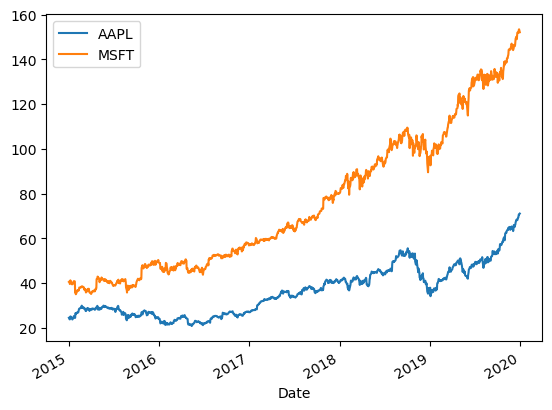

In [32]:
data = getClose(["AAPL", "MSFT"], "2015-01-01", "2019-12-31")
data.plot()

Calcule los rendimientos diarios junto con sus características estadísticas

<Axes: ylabel='Frequency'>

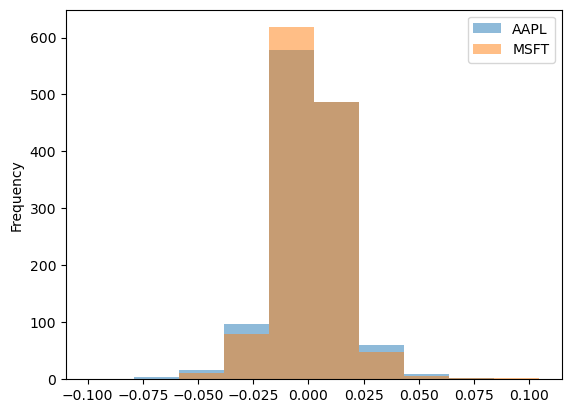

In [31]:
R = (data - data.shift())/data.shift()
R.plot.hist(alpha = 0.5)

In [33]:
R.describe()

,AAPL,MSFT
count,1256.000000,1256.000000
mean,0.000971,0.001161
std,0.015651,0.014692
min,-0.099608,-0.092534
25%,-0.005857,-0.005404
50%,0.000892,0.000889
75%,0.008924,0.008058
max,0.070421,0.104522


La media de Apple es de 0.000971, mientras que la media de Microsoft es 0.001161.

La desviación estándar de Apple es de 0.015651, mientras que la desviación estándar de Microsoft es de 0.014692.

Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

In [34]:
def sim_R(media, std, fecha_inicio, dias, N):
    R_sim = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(start=fecha_inicio, periods=dias)
    return pd.DataFrame(index=fechas, data=R_sim)

In [38]:
sim_aapl = sim_R(R["AAPL"].mean(), R["AAPL"].std(), "2020-01-01", 366, 1000)
sim_msft = sim_R(R["MSFT"].mean(), R["MSFT"].std(), "2020-01-01", 366, 1000)

Calcule los precios con base en los rendimientos simulados

In [40]:
sim_precios_aapl = data["AAPL"][-1]*(1 + sim_aapl).cumprod()
sim_precios_msft = data["MSFT"][-1]*(1 + sim_msft).cumprod()

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

In [41]:
porcentaje = 1.2
valor_deseado_aapl = data["AAPL"][-1]*porcentaje
valor_deseado_msft = data["MSFT"][-1]*porcentaje

In [42]:
sobrepasa_aapl = valor_deseado_aapl <= sim_precios_aapl
sobrepasa_msft = valor_deseado_msft <= sim_precios_msft

In [43]:
probabilidad_aapl = sobrepasa_aapl.mean(axis=1)
probabilidad_msft = sobrepasa_msft.mean(axis=1)

<Axes: >

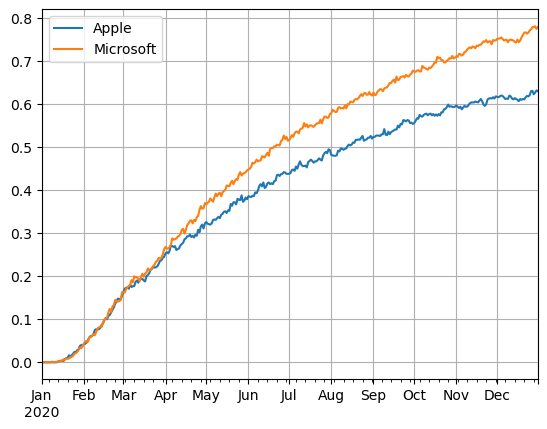

In [44]:
tabla = pd.DataFrame(index=probabilidad_aapl.index)
tabla["Apple"] = probabilidad_aapl
tabla["Microsoft"] = probabilidad_msft
tabla.plot(grid=True)

Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.

In [52]:
data = getClose(["AAPL", "MSFT"], "2020-01-01", "2020-12-31")

[*********************100%%**********************]  2 of 2 completed


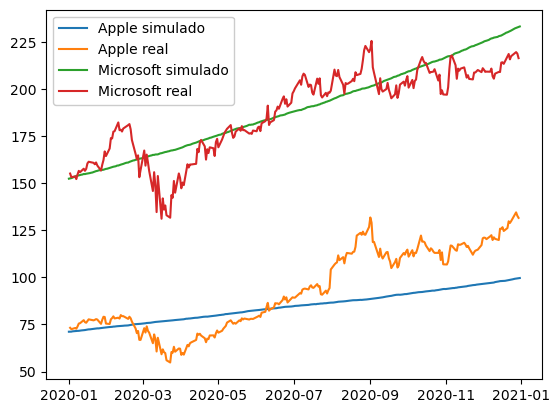

In [51]:
plt.figure()
plt.plot(sim_precios_aapl.mean(axis=1), label="Apple simulado")
plt.plot(data["AAPL"], label="Apple real")
plt.plot(sim_precios_msft.mean(axis=1), label="Microsoft simulado")
plt.plot(data["MSFT"], label="Microsoft real")
plt.legend(framealpha=1, frameon=True)

## Probabilidad

Imagina que en un país la estatura promedio es 164 centímetros, con una desviación estándar de 4 centímetros. ¿Cuál es la probabilidad de que si sumamos la estatura de 20 personas se obtenga un valor mayor a 30 metros?

In [58]:
def sim_R(media, std, personas, N):
    R_sim = np.random.normal(media, std, size=(personas, N))
    return R_sim

In [64]:
media = 164
desviacion = 4
p = 20

data = pd.DataFrame(sim_R(media, desviacion, p, 1000))
data

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,164.961557,163.294456,158.449705,172.599881,164.592413,163.996002,159.671010,167.090857,160.314160,159.893786,...,165.912506,162.607826,168.786166,161.188354,162.448626,174.587299,160.100272,166.452549,167.196374,167.165950
1,157.555077,158.522161,164.011019,162.417025,159.160006,159.979807,162.563460,164.710297,172.457762,166.187212,...,165.746732,165.857952,169.333380,161.404417,162.209781,161.427256,162.898214,165.000787,162.228723,159.328572
2,169.924877,169.699429,164.441642,159.517870,164.098869,163.859147,156.381639,160.924947,159.853040,159.817934,...,161.755885,169.052632,158.106921,172.122579,157.390620,166.371654,168.977311,163.164231,165.063351,163.662636
3,163.694733,163.987639,163.528153,166.369061,158.761186,165.112132,164.931489,160.922948,163.572355,174.016548,...,163.456543,163.274111,166.064701,158.252115,166.613854,165.984079,163.763900,164.762013,158.120961,162.516675
4,164.643567,166.643463,163.661029,166.802921,162.584921,164.931372,157.728848,159.506245,161.212022,168.770280,...,168.353871,164.789043,161.017734,164.185268,173.377182,164.432272,171.775477,165.595985,168.565671,158.629933
5,160.266969,164.797394,168.574723,167.444614,165.324503,161.743934,163.537784,168.230881,165.038228,167.909046,...,165.503498,161.873434,161.636314,165.612753,164.624285,169.218415,165.822318,160.686277,162.070874,158.451340
6,159.966129,164.761258,165.454576,166.035345,168.037417,166.268732,169.373544,170.591487,165.306325,159.284100,...,166.679273,160.620659,166.253577,171.805933,166.190415,166.827692,169.323652,168.188292,161.809748,161.527353
7,160.921187,166.840365,162.426237,164.406074,167.864749,159.865462,168.314857,166.044868,165.863056,162.045718,...,162.290085,165.329913,162.807192,165.213468,158.822173,164.218986,171.028029,157.658283,163.031946,168.934793
8,167.217061,161.923985,166.505470,162.169608,168.465977,158.101498,161.882920,162.371808,172.625056,165.785099,...,166.270477,159.130587,164.363627,164.327366,165.116572,172.435090,161.714572,158.581848,161.798804,166.781615
9,158.707646,155.969065,162.888309,162.576521,164.596784,162.843955,172.144234,159.394405,160.908055,164.068124,...,165.889940,165.850718,162.796216,168.782837,164.083377,164.865836,159.006035,167.995099,165.046131,167.861454


In [65]:
data.sum()

0      3270.215135
1      3273.910794
2      3265.081380
3      3283.338616
4      3278.649795
          ...     
995    3301.984245
996    3304.090238
997    3276.328251
998    3268.712285
999    3273.995047
Length: 1000, dtype: float64

In [67]:
(data.sum() > 3000).mean()

1.0